## Imports 

In [12]:
import pandas as pd 
import numpy as np 

from scipy import stats
import math 

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt 

## Retrieve data including 30 of the best wingers in Europe

In [56]:
df = pd.read_csv("../../data/top_forwards_europe/stats_per90.csv")

In [14]:
df.shape

(30, 46)

## Clean the data

In [67]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [68]:
df.head()

,Player,Span,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,...,PassDead.1,Drib.1,Touches,Mid 3rd,Att 3rd,Att Pen,DribSucc%,TotDist.1,PrgDist.1,CPA
0,Son Heung-min,2020-21,FW,Tottenham,37,36,3114,34.6,0.49,0.29,...,0.06,0.06,44.5,19.0,23.5,4.13,62.3,164.9,85.0,0.95
1,Sadio Mané,2020-21,FW,Liverpool,35,31,2810,31.2,0.35,0.22,...,0.00,0.00,51.0,19.4,32.6,9.07,59.2,219.0,123.3,1.73
2,Cristiano Ronaldo,2020-21,FW,Juventus,33,31,2802,31.1,0.93,0.06,...,0.00,0.10,47.0,21.7,27.2,6.85,64.4,207.1,134.7,1.90
3,Mohamed Salah,2020-21,FW,Liverpool,37,34,3078,34.2,0.64,0.15,...,0.00,0.00,51.4,18.2,33.9,9.15,50.5,184.7,100.9,1.58
4,Kylian Mbappé,2020-21,FW,Paris S-G,31,27,2380,26.4,1.02,0.26,...,0.00,0.27,54.6,18.7,38.7,10.50,46.6,241.9,163.4,2.61


## Load some fonts

In [9]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

## Select some columns

In [57]:
df.columns

Index(['Player', 'Span', 'Pos', 'Squad', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'G+A-PK', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'PassesCmp', 'PassesAtt', 'PassesCmp%', 'TotDist',
       'PrgDist', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'SCA', 'PassLive',
       'PassDead', 'Drib', 'GCA', 'PassLive.1', 'PassDead.1', 'Drib.1',
       'Touches', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'DribSucc%', 'TotDist.1',
       'PrgDist.1', 'CPA'],
      dtype='object')

In [82]:
params = ["Gls", 'G+A', 'G-PK', 'Sh', 'SoT','SoT%', 'G/Sh',"Ast",'PassesCmp%','KP', 'SCA', 'GCA', "Att Pen", "DribSucc%", 'CPA']

## Select Son data

In [83]:
player = df.loc[df['Player']=='Son Heung-min'].reset_index()

In [84]:
player

,index,Player,Span,Pos,Squad,MP,Starts,Min,90s,Gls,...,PassDead.1,Drib.1,Touches,Mid 3rd,Att 3rd,Att Pen,DribSucc%,TotDist.1,PrgDist.1,CPA
0,0,Son Heung-min,2020-21,FW,Tottenham,37,36,3114,34.6,0.49,...,0.06,0.06,44.5,19.0,23.5,4.13,62.3,164.9,85.0,0.95


In [85]:
player = player[params]

In [86]:
player

,Gls,G+A,G-PK,Sh,SoT,SoT%,G/Sh,Ast,PassesCmp%,KP,SCA,GCA,Att Pen,DribSucc%,CPA
0,0.49,0.78,0.46,1.97,1.01,51.5,0.24,0.29,76.7,2.23,3.38,0.43,4.13,62.3,0.95


In [87]:
player = list(player.loc[0])
print(player)

[0.49, 0.78, 0.46, 1.97, 1.01, 51.5, 0.24, 0.29, 76.7, 2.23, 3.38, 0.43, 4.13, 62.3, 0.95]


In [88]:
print(len(params), len(player))

15 15


## Calculate the percentiles

In [89]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [91]:
round(stats.percentileofscore(df[params[0]],player[0]))

70

In [92]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

## Build the pizza

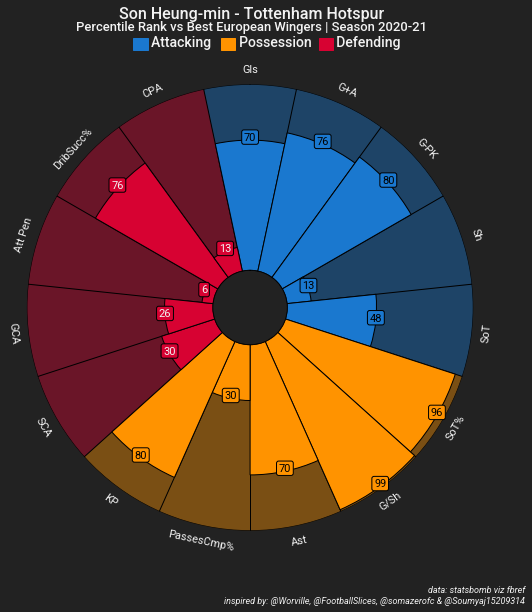

In [93]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Son Heung-min - Tottenham Hotspur", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Best European Wingers | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.93, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

plt.show()